In [1]:
# --------------------------------------
import warnings

warnings.filterwarnings("ignore")

# --------------------------------------
from copy import deepcopy

# --------------------------------------
from PIL import Image

# --------------------------------------
import numpy as np

# --------------------------------------
import matplotlib.pyplot as plt

# --------------------------------------
import streetscapes as scs

Instantiate a DinoSAM model

In [2]:
model = scs.models.DinoSAM()

Select an image at random.

<span style="color:red;">Note</span>: please make sure that you download some images first (cf. `download_city_images.ipynb`).

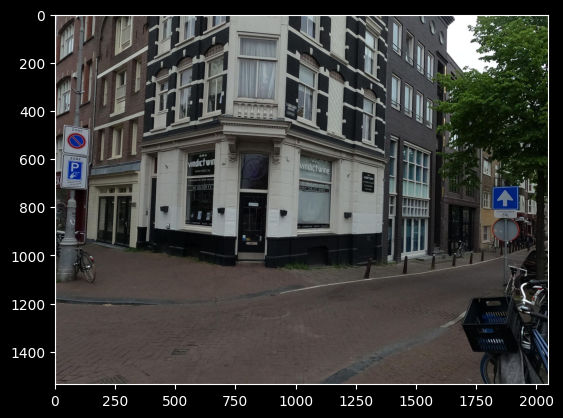

In [10]:
image_dir = scs.conf.OUTPUT_DIR / "images"
test_image = list(np.random.choice(list(image_dir.glob("*.jpeg")), 1, replace=False))[0]
img_data = np.array(Image.open(test_image))
plt.imshow(img_data)

Define some categories of objects that we would like to extract. It is possible to define categories hierarchically so that categories deeper in the hierarchy would be 'subtracted' from their parents ones. For instance, this can be used to instruct the model to extract 'building' objects _without_ 'window' or 'door' objects. This example is used below.

In [11]:
labels = {
    "sky": None,
    "building": {
        "window": None,
        "door": None,
    },
    "tree": None,
    "car": None,
    "truck": None,
    "road": None,
}

Perform the segmentation and remove category overlaps.

In [ ]:
segmentations = model.segment({test_image.name: img_data}, labels)

Streetscapes | 2025-02-17@15:38:09 | Detecting objects...
Streetscapes | 2025-02-17@15:38:17 | Performing segmentation...
Streetscapes | 2025-02-17@15:38:30 | Removing overlaps...
Streetscapes | 2025-02-17@15:38:34 | [ 734719424366533.jpeg ] Extracted 57 instances for 6 labels.


Get the segmentation dictionary

In [13]:
seg = segmentations[0]
seg

{'masks': array([[ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        ...,
        [53, 53, 53, ...,  0,  0,  0],
        [53, 53, 53, ...,  0,  0,  0],
        [53, 53, 53, ...,  0,  0,  0]], shape=(1536, 2048), dtype=uint32),
 'outlines': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(1536, 2048), dtype=uint32),
 'instance_ids': {1: 'tree',
  2: 'window',
  3: 'window',
  4: 'window',
  5: 'window',
  6: 'window',
  7: 'window',
  8: 'window',
  9: 'window',
  10: 'window',
  11: 'window',
  12: 'window',
  13: 'window',
  14: 'window',
  15: 'window',
  16: 'window',
  17: 'window',
  18: 'window',
  19: 'window',
  20: 'window',
  21: 'window',
  22: 'window',
  23: 'window',
  24: 'window',
  25: 'window',
  26: 'window',
  27: 'window',
  28: 'windo

Make a copy of the label dictionary so that we can modify it.

In [14]:
instance_labels = deepcopy(seg["instance_labels"])

Visualise only buildings and windows

In [15]:
instance_labels = {k: v for k, v in instance_labels.items() if k in ['building', 'window']}
instance_ids = seg["instance_ids"]
masks = seg["masks"]
outlines = seg["outlines"]

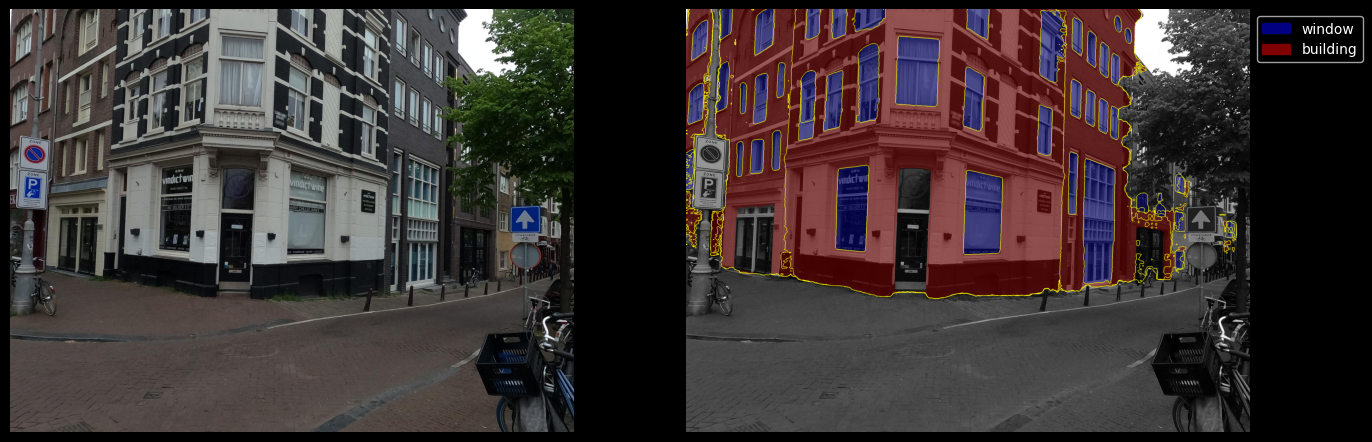

In [ ]:
(fig, ax) = model.visualise_segmentation(img_data, instance_labels, instance_ids, masks, outlines, outline_colour="#ffff00")